In [33]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
X, Y = make_classification(n_samples=200, n_features=2, n_informative=1, n_redundant=0, n_classes=2,
                           n_clusters_per_class=1, random_state=80, hypercube=None, class_sep=15)

In [17]:
X.shape

(200, 2)

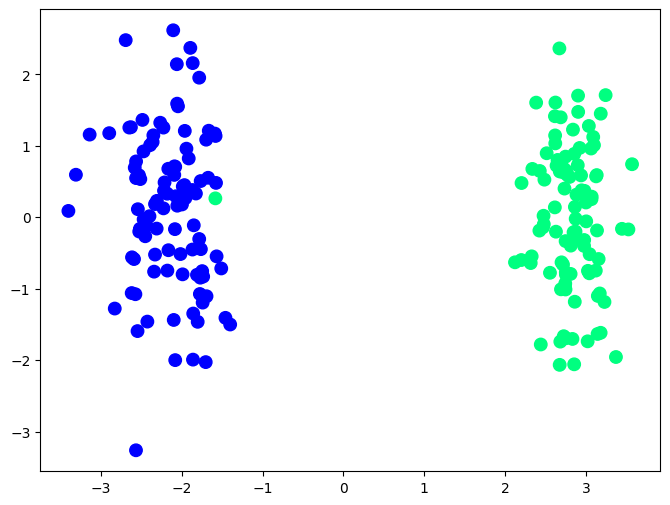

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c = Y, cmap='winter', s = 80)

In [29]:
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
logi_reg = LogisticRegression(penalty='none', solver='sag')
#none means we are applying any regularization here,
# sag is a solver for optimization
logi_reg.fit(X,Y)

LogisticRegression(penalty='none', solver='sag')

In [30]:
logi_reg.coef_

array([[4.048318 , 0.3210224]])

In [31]:
logi_reg.intercept_

array([3.02599085])

In [53]:
m1 = -(logi_reg.coef_[0][0]/logi_reg.coef_[0][1])
b1 = -(logi_reg.intercept_/logi_reg.coef_[0][1])

In [60]:
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m1 * x_input1 + b1

# Our Own optimized class for Logistic Regression Using Gradient Descent

In [61]:
def gd(X, Y):
    X = np.insert(X, 0, 1, axis = 1) # adding 1 at the front
    weights = np.ones(X.shape[1]) # [w0 w1 w2 ... wn]
    lr = 0.01
    
    for i in range(10000):
        y_hat = sigmoid(np.dot(X, weights))
        weights = weights + lr*(np.dot((Y - y_hat), X)*X.shape[0])
    return weights[1:], weights[0]

In [62]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [63]:
coef_, intercept_ = gd(X,Y)

In [64]:
m2 = -(coef_[0]/coef_[1])
b2 = -(intercept_/coef_[1])

In [65]:
x_input2 = np.linspace(-3, 3, 100)
y_input2 = m1 * x_input2 + b1

(-3.0, 2.0)

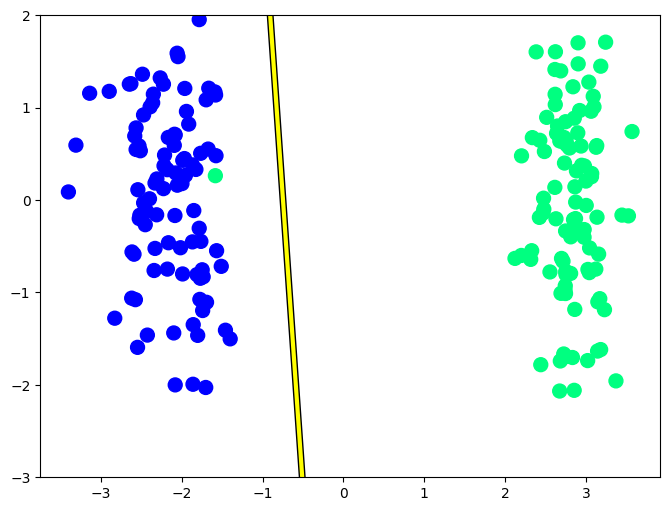

In [71]:
plt.figure(figsize=(8,6))
plt.plot(x_input1,y_input1,color='black',linewidth=5)# line of Logistic Regression sklearn
plt.plot(x_input2,y_input2,color='yellow',linewidth=3) # our line from our class
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)
plt.ylim(-3,2)